# Рынок заведений общественного питания Москвы

Задача - анализ рынка общественного питания в Москве для привлечения инвестиций в проект по открытию кафе.

Предоставлены данные, содержащие идентификатор объекта общественного питания, название, принадлежность объекта сети, тип объекта, адрес, количество посадочных мест.

## Шаг №1. Загрузка данных и подготовка их к анализу <a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import pylab as pl
import numpy as np
from IPython.display import display
import plotly.express as px 
import datetime as dt
import scipy.stats
import scipy.stats as stats
import plotly.express as px
import seaborn as sns
from plotly import graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"
pd.options.mode.chained_assignment = None 

In [2]:
pip install seaborn --upgrade

Requirement already up-to-date: seaborn in ./opt/anaconda3/lib/python3.8/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly --upgrade

Requirement already up-to-date: plotly in ./opt/anaconda3/lib/python3.8/site-packages (4.14.3)
Note: you may need to restart the kernel to use updated packages.


In [4]:
rest_data = pd.read_csv('rest_data.csv')

In [5]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
display(rest_data.head(5))

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Пропущенных переменных нет. Всего 15366 наблюдений. Необходимо заменить значения переменных *object_name* и *address* на нижние регистры для проверки на дубликаты.

In [7]:
rest_data['object_name']= rest_data['object_name'].str.lower()
rest_data['address']= rest_data['address'].str.lower()

In [8]:
n = rest_data.duplicated(subset = ['object_name','address','number','object_type'])
n.value_counts()

False    15281
True        85
dtype: int64

В данных есть дубликаты (85). Удалим их. 

In [9]:
rest_data[rest_data.duplicated(subset = ['object_name','address','number','object_type'])].head(5)


,id,object_name,chain,object_type,address,number
2381,28611,комбинат питания мгту им.н.э.баумана,нет,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",100
3397,71896,буфет «коникс-школьник»,нет,буфет,"город москва, улица удальцова, дом 21",100
3481,20914,буфет мади,нет,буфет,"город москва, ленинградский проспект, дом 64",40
4431,23759,столовая гбоу города москвы № 384,нет,буфет,"город москва, беловежская улица, дом 67",100
4537,23391,столовая «комбинат питания космос»,нет,столовая,"город москва, новозаводская улица, дом 12/11",15


In [10]:
rest_data = rest_data.drop_duplicates(subset = ['object_name','address','number','object_type'])

In [11]:
len(rest_data['object_name'].unique())

9924

## Вывод


В данных отсутствовуют пропущенные значения. Всего 15366 наблюдений. Было найдено 85 дубликатов, которые могли появиться из-за сбоя в сборе данных. Для того чтобы не искажать результаты удалим их.Уникальных заведений всего 9924.

## Шаг №2. Анализ данных <a id="analysis"></a>

* Исследуем соотношение видов объектов общественного питания по количеству. <a id="p1"></a>

In [12]:
rest_data1 = rest_data.pivot_table(index = 'object_type', values = 'object_name', aggfunc ='count').reset_index()
rest_data1 = rest_data1.sort_values(by='object_name',ascending = False)
display(rest_data1)

,object_type,object_name
3,кафе,6071
8,столовая,2584
7,ресторан,2282
6,предприятие быстрого обслуживания,1897
0,бар,855
1,буфет,576
4,кафетерий,395
2,закусочная,348
5,магазин (отдел кулинарии),273


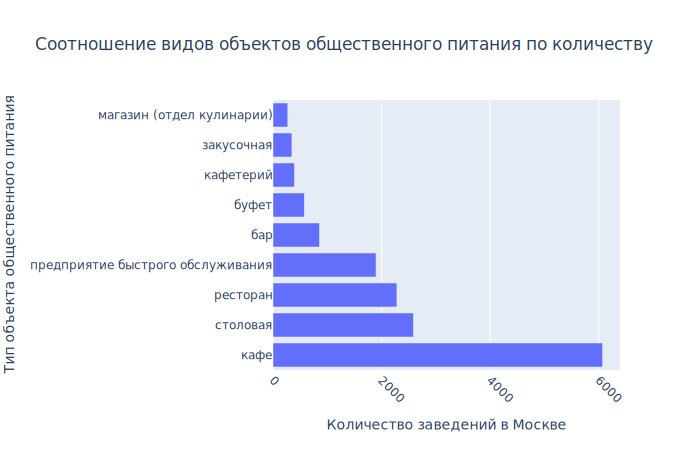

In [13]:
fig = px.bar(rest_data1, x='object_name', y='object_type',orientation='h', title='Соотношение видов объектов общественного питания по количеству', labels=dict(object_type="Тип объекта общественного питания", object_name="Количество заведений в Москве"))
fig.update_xaxes(tickangle=45)
fig.show() 

In [14]:
rest_data1['ratio'] = rest_data1['object_name']/rest_data1['object_name'].sum()*100

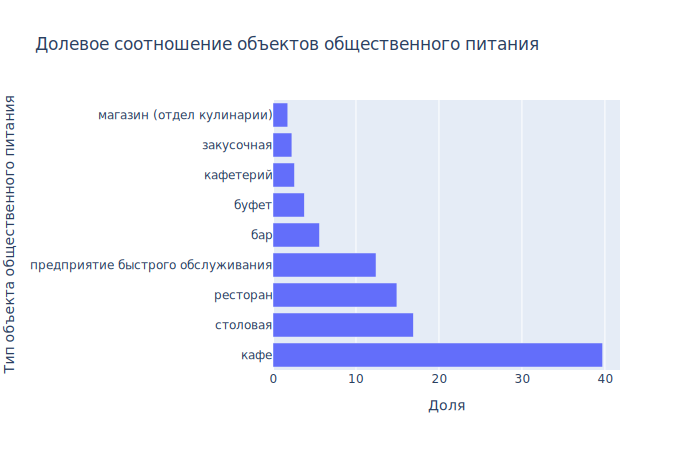

In [15]:
fig = px.bar(rest_data1,x='ratio', y='object_type', title='Долевое соотношение объектов общественного питания',labels=dict(object_type="Тип объекта общественного питания", ratio="Доля"))
fig.show()

Самое большое количество заведений среди кафе, на втором месте - столовые, третье - рестораны. Наименьшее количество заведений среди закусочных и отделов кулинарии в магазинах.

* Исследуем соотношение сетевых и несетевых заведений по количеству. <a id="p2"></a>

In [16]:
rest_data2 = rest_data.pivot_table(index = 'chain', values = 'object_name', aggfunc ='count').reset_index()
rest_data2['chain'] = rest_data2['chain'].astype('category')
rest_data2['chain'] = rest_data2['chain'].replace('да', 'Сетевое заведение')
rest_data2['chain'] = rest_data2['chain'].replace('нет', 'Несетевое заведение')

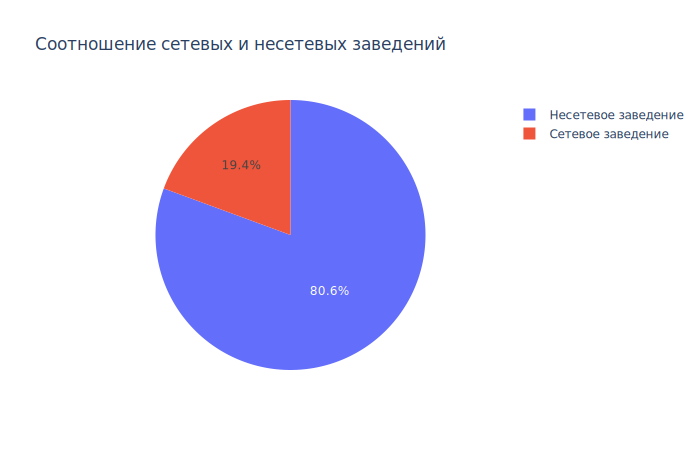

In [17]:
fig = px.pie(rest_data2, values='object_name', names='chain', title='Соотношение сетевых и несетевых заведений')
fig.show()

In [18]:
rest_data2['ratio']=rest_data2['object_name']/(rest_data2['object_name'][0]+rest_data2['object_name'][1])*100
rest_data2['ratio']=rest_data2['ratio'].round(2)

In [19]:
display(rest_data2)

,chain,object_name,ratio
0,Сетевое заведение,2964,19.4
1,Несетевое заведение,12317,80.6


81% данных - это несетвые заведений, соответственно 19% - сетевые.  

* Для какого вида объекта общественного питания характерно сетевое распространение? <a id="p3"></a>

In [20]:
rest_data3 = rest_data.pivot_table(index = ['chain','object_type'], values = 'object_name', aggfunc ='count').reset_index()
rest_data3 = rest_data3.sort_values(by='object_name',ascending = False)
rest_data3 = rest_data3[rest_data3['chain']=='да']
rest_data3['ratio'] = rest_data3['object_name']/rest_data3['object_name'].sum()*100
display(rest_data3)

,chain,object_type,object_name,ratio
3,да,кафе,1396,47.098516
6,да,предприятие быстрого обслуживания,788,26.585695
7,да,ресторан,543,18.319838
5,да,магазин (отдел кулинарии),78,2.631579
2,да,закусочная,56,1.889339
4,да,кафетерий,52,1.754386
0,да,бар,37,1.248313
1,да,буфет,11,0.371120
8,да,столовая,3,0.101215


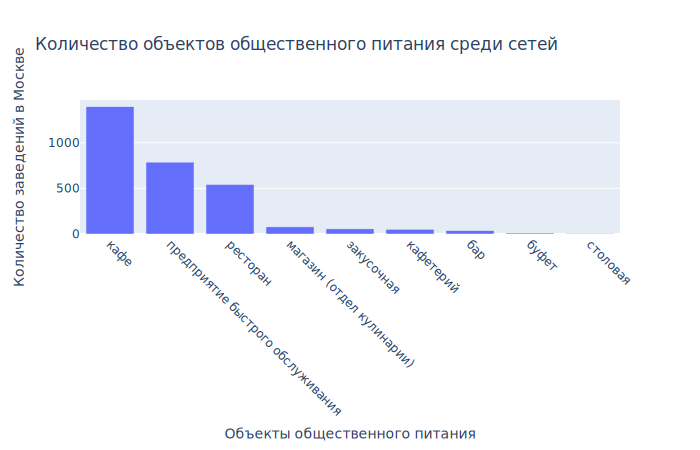

In [21]:
fig = px.bar(rest_data3, x='object_type', y='object_name', title='Количество объектов общественного питания среди сетей ',labels=dict(object_type="Объекты общественного питания", object_name="Количество заведений в Москве", color=['сеть','не сеть']))
fig.update_xaxes(tickangle=45)
fig.show() 

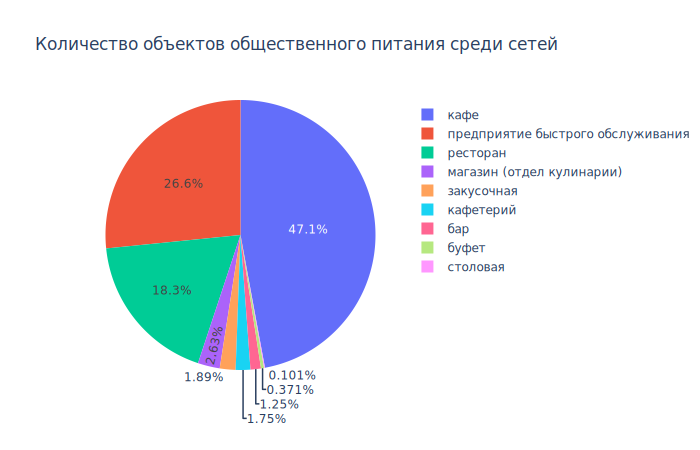

In [22]:
fig = px.pie(rest_data3, values='ratio', names='object_type', title='Количество объектов общественного питания среди сетей')
fig.show()

Среди сетей больше всего заведений среди кафе (47% сетевых заведений), предприятий быстрого обслуживания (27%), ресторанов(18%). 

In [23]:
restt_data = rest_data.pivot_table(index = ['object_type','chain'], values = 'object_name', aggfunc='count').reset_index()
restt_data1=restt_data.groupby(['object_type']).agg({'object_name':'sum'}).reset_index()
restt_data1 = restt_data1.rename(columns={"object_name": 'sum_all'})
restt_data1

,object_type,sum_all
0,бар,855
1,буфет,576
2,закусочная,348
3,кафе,6071
4,кафетерий,395
5,магазин (отдел кулинарии),273
6,предприятие быстрого обслуживания,1897
7,ресторан,2282
8,столовая,2584


In [24]:
restt_data = rest_data.pivot_table(index = ['object_type','chain'], values = 'object_name', aggfunc='count').reset_index()
restt_data=restt_data[restt_data['chain']=='да']
restt_data=restt_data.drop(columns = 'chain')
restt_data= restt_data.merge(restt_data1, on = 'object_type')
restt_data['ratio'] = restt_data['object_name']/restt_data['sum_all']*100
restt_data['ratio'] = restt_data['ratio'].round(2)
restt_data = restt_data.sort_values(by='ratio',ascending=False)
display(restt_data)


,object_type,object_name,sum_all,ratio
6,предприятие быстрого обслуживания,788,1897,41.54
5,магазин (отдел кулинарии),78,273,28.57
7,ресторан,543,2282,23.79
3,кафе,1396,6071,22.99
2,закусочная,56,348,16.09
4,кафетерий,52,395,13.16
0,бар,37,855,4.33
1,буфет,11,576,1.91
8,столовая,3,2584,0.12


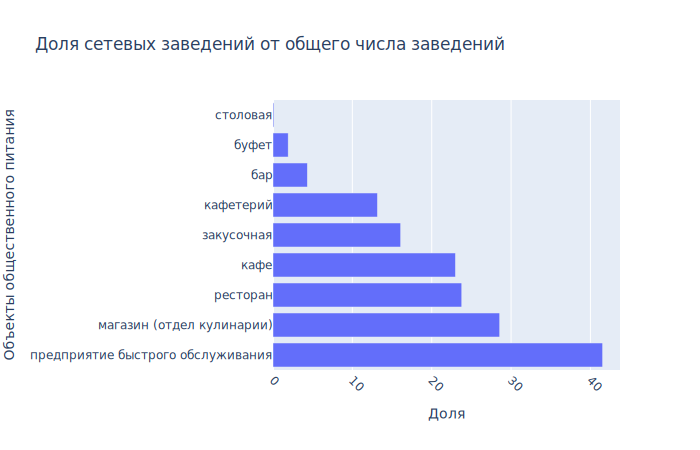

In [25]:
fig = px.bar(restt_data, x='ratio', y='object_type',orientation='h', title='Доля сетевых заведений от общего числа заведений ',labels=dict(object_type="Объекты общественного питания", ratio="Доля"))
fig.update_xaxes(tickangle=45)
fig.show() 

Можно увидеть, что сетевое распространение характерно для предприятий быстрого обслуживания (42%), магазинов(отдел кулинаии)(29%), ресторанов (24%).

* Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? <a id="p4"></a>

In [26]:
display(rest_data)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское ш...",36


In [27]:
chains = rest_data[rest_data['chain']=='да']

In [28]:
len(chains['object_name'].unique())

577

In [29]:
chains2 = chains.groupby(['object_name']).agg({'object_name': 'count'})
chains2 = chains2.rename(columns={"object_name": 'count'})
chains2 = chains2.reset_index()
display(chains2)

,object_name,count
0,beverly hills diner,1
1,bierloga,1
2,black & white,1
3,bocconcino,3
4,boobo,1
...,...,...
572,ямми микс,1
573,ян примус,1
574,японский ресторан «ваби-саби»,1
575,япоша,2


In [30]:
chains2 = chains.merge(chains2, on='object_name',how = 'inner')
chains4 = chains2.groupby(['object_name']).agg({'number':'median','count':'mean'})
display(chains2.head(5))

,id,object_name,chain,object_type,address,number,count
0,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,2
1,135770,пиццетория,да,кафе,"город москва, дубнинская улица, дом 53, корпус 1",25,2
2,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,8
3,111162,брусника,да,кафе,"город москва, проспект мира, дом 49",40,8
4,77314,брусника,да,кафе,"город москва, улица маросейка, дом 6-8, строен...",62,8


In [31]:
display(chains4.head(5))

,number,count
object_name,,
beverly hills diner,88.0,1
bierloga,75.0,1
black & white,40.0,1
bocconcino,68.0,3
boobo,46.0,1


In [32]:
chains4['number'].describe()

count    577.000000
mean      58.050260
std       53.690229
min        0.000000
25%       20.000000
50%       43.500000
75%       83.500000
max      306.000000
Name: number, dtype: float64

In [33]:
chains4['count'].describe()

count    577.000000
mean       5.136915
std       15.526198
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      157.000000
Name: count, dtype: float64

Text(0, 0.5, 'Число посадочных мест')

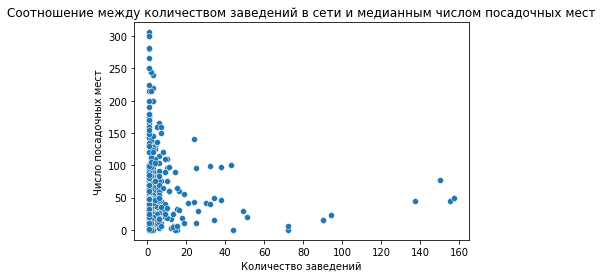

In [34]:
n = sns.scatterplot(data=chains4,x="count", y="number")
plt.title('Соотношение между количеством заведений в сети и медианным числом посадочных мест')
plt.xlabel('Количество заведений')
plt.ylabel('Число посадочных мест')

Text(0, 0.5, 'Число посадочных мест')

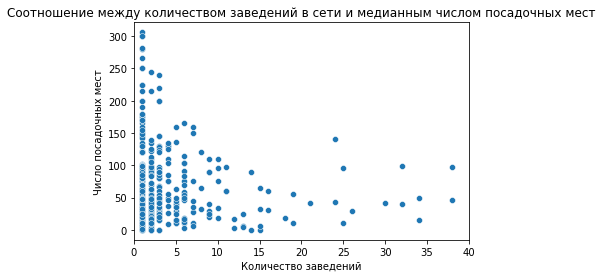

In [35]:
n = sns.scatterplot(data=chains4,x="count", y="number")
n.set(xlim=(0, 40))
plt.title('Соотношение между количеством заведений в сети и медианным числом посадочных мест')
plt.xlabel('Количество заведений')
plt.ylabel('Число посадочных мест')

По графику можно заметить, что для сетей характерно меньшее количество заведений, но большее количество посадочных мест. 75% сетей имеют 3 заведения в Москве или менее. При этом для 75% характерно до 84 посадочных мест в заведении.

* Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? <a id="p5"></a>

In [36]:
objects = rest_data.groupby(['object_type']).agg({'number':'mean'}).reset_index()
objects = objects.sort_values(by='number', ascending = False)
display(objects)

,object_type,number
8,столовая,130.337848
7,ресторан,96.884750
1,буфет,51.425347
0,бар,43.533333
3,кафе,39.785703
6,предприятие быстрого обслуживания,20.808645
4,кафетерий,9.184810
2,закусочная,7.847701
5,магазин (отдел кулинарии),5.589744


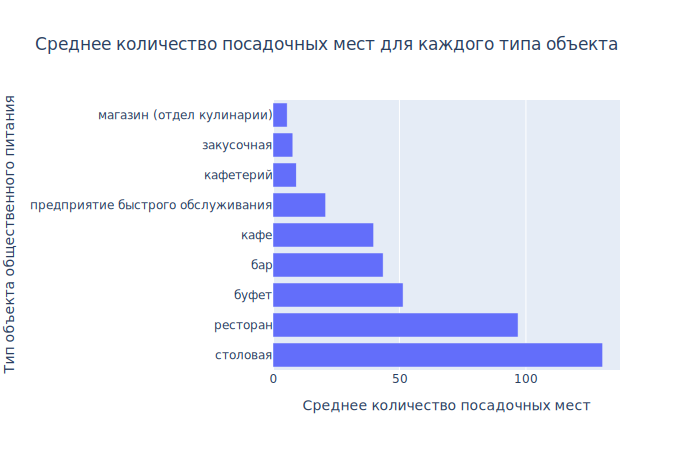

In [37]:
fig = px.bar(objects, x='number', y='object_type',orientation ='h', title='Среднее количество посадочных мест для каждого типа объекта', labels=dict(object_type="Тип объекта общественного питания", number="Среднее количество посадочных мест"))
fig.show() 

Наибольшее количество посадочных мест характерно для столовых (в среднем 130), ресторанов (в среднем 97), буфетов (в среднем 51).

* Выделим в отдельный столбец информацию об улице из столбца address  <a id="p6"></a>

In [38]:
rest_data['street'] = rest_data['address'].str.split(',').str[1]
rest_data['street']=rest_data['street'].str.strip()

In [39]:
display(rest_data)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10,улица земляной вал
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал
15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское ш...",36,поселение московский


* Построим график топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы? <a id="p7"></a>

In [40]:
obj = rest_data.groupby(['street']).agg({'object_name':'count'}).reset_index()

In [41]:
obj = obj[~obj['street'].str.contains('город', na=False)]
obj = obj[~obj['street'].str.contains('поселение', na=False)]
top10 = obj.sort_values(by='object_name',ascending =False).head(10)
display(top10)

,street,object_name
1121,проспект мира,203
1125,профсоюзная улица,181
747,ленинградский проспект,170
1082,пресненская набережная,167
417,варшавское шоссе,161
750,ленинский проспект,147
1118,проспект вернадского,128
738,кутузовский проспект,114
663,каширское шоссе,111
669,кировоградская улица,108


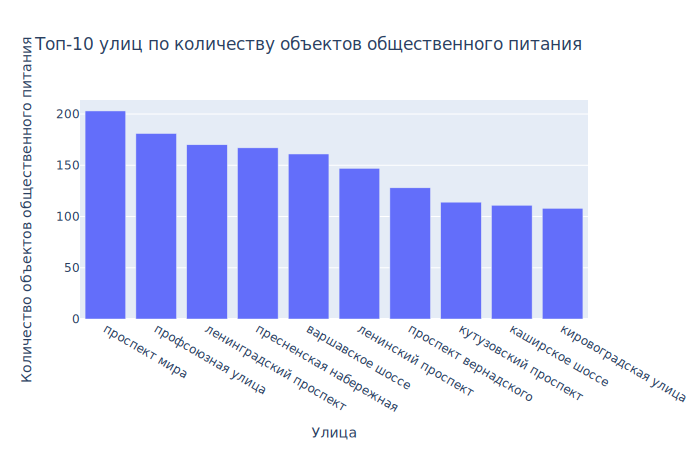

In [42]:
fig = px.bar(top10, x='street', y='object_name',title = 'Топ-10 улиц по количеству объектов общественного питания',labels=dict(street='Улица', object_name ="Количество объектов общественного питания"))
fig.show() 

Большее количество заведений находится на улицах - проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернандского, Кутузовский проспект, Каширское шоссе, Кировоградская улица.

* **Проспект Мира**:   
    - Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино  
    
* **Профсоюзная улица:**  
    - Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки,Ясенево  

* **Ленинградский проспект:**
    - Беговой, Аэропорт, Сокол, Хорошёвский

* **Пресненская набережная:**
    - Пресненский
* **Варшавское шоссе:**
    - Донской, Нагатино-Садовники, Нагорный, Чертаново Северное, Чертаново Центральное, Чертаново Южное, Южное Бутово, Щербинка
* **Ленинский проспект:**
    - Якиманка, Донской, Гагаринский, Ломоносовский, Обручевский, Теплый Стан,Проспект Вернадского, Тропарево-Никулино
                                                                                               
* **Проспект Вернандского:**
    - Гагаринский, Ломоносовский, Раменки, Проспект Вернандского, Тропарево-Никулино

* **Кутузовский проспект:**
    - Дорогомилово, Фили-Давыдково
* **Каширское шоссе:**
    - Москворечье-Сабурово,  Орехово-Борисово Северное, Орехово-Борисово Южное, Нагатино-Садовники
* **Кировоградская улица:**
    - Чертаново Северное, Чертаново Центральное, Чертаново Южное

* Найдем число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы? <a id="p8"></a>

In [43]:
display(obj[obj['object_name']==1])

,street,object_name
2,1-й балтийский переулок,1
3,1-й басманный переулок,1
4,1-й ботанический проезд,1
7,1-й вешняковский проезд,1
9,1-й голутвинский переулок,1
...,...,...
1889,ялтинская улица,1
1890,янтарный проезд,1
1895,ясногорская улица,1
1898,яузский бульвар,1


In [44]:
obj_1 = obj[obj['object_name']==1]

Всего 576 улиц, на которых расположено по одному объекту общественного питания. 

Воспользуемся данными мосгаза по соотнесению улиц и районов Москвы.

In [45]:
from io import BytesIO
import requests
spreadsheet_id = '1TwOEHjl_E7A65BZXXd7tdnIZj33W2qPvTR3P6jaMhI8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content),skipinitialspace=True)
streets

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [46]:
streets['street']= streets['streetname'].str.lower().str.strip()


In [47]:
obj_1['street']= obj_1['street'].str.strip()

In [48]:
streets_rest = obj_1.merge(streets,how = 'left',on ='street')

In [49]:
display(streets_rest)

,street,object_name,streetname,areaid,okrug,area
0,1-й балтийский переулок,1,1-й Балтийский переулок,54.0,САО,Район Аэропорт
1,1-й басманный переулок,1,1-й Басманный переулок,13.0,ЦАО,Басманный район
2,1-й басманный переулок,1,1-й Басманный переулок,15.0,ЦАО,Красносельский район
3,1-й ботанический проезд,1,1-й Ботанический проезд,82.0,СВАО,Район Свиблово
4,1-й вешняковский проезд,1,1-й Вешняковский проезд,120.0,ЮВАО,Рязанский район
...,...,...,...,...,...,...
613,ялтинская улица,1,Ялтинская улица,104.0,ЮАО,Нагорный район
614,янтарный проезд,1,Янтарный проезд,76.0,СВАО,Лосиноостровский район
615,ясногорская улица,1,Ясногорская улица,134.0,ЮЗАО,Район Ясенево
616,яузский бульвар,1,Яузский бульвар,18.0,ЦАО,Таганский район


In [50]:
streets_s = streets_rest.drop_duplicates('area').dropna()
streets_s = streets_s['area'].sort_values()
for area in streets_s:
    print('*', area)

* Алексеевский район
* Алтуфьевский район
* Бабушкинский район
* Басманный район
* Бескудниковский Район
* Бутырский район
* Войковский Район
* Головинский район
* Даниловский район
* Дмитровский район
* Донской район
* Красносельский район
* Лосиноостровский район
* Мещанский район
* Можайский Район
* Молжаниновский район
* Нагорный район
* Нижегородский район
* Обручевский район
* Останкинский район
* Пресненский район
* Район Арбат
* Район Аэропорт
* Район Беговой
* Район Бирюлево Восточное
* Район Богородское
* Район Внуково
* Район Восточное Измайлово
* Район Восточный
* Район Выхино-Жулебино
* Район Гагаринский
* Район Гольяново
* Район Дорогомилово
* Район Замоскворечье
* Район Западное Дегунино
* Район Зюзино
* Район Ивановское
* Район Измайлово
* Район Коньково
* Район Коптево
* Район Косино-Ухтомский
* Район Котловка
* Район Кузьминки
* Район Кунцево
* Район Куркино
* Район Левобережный
* Район Лефортово
* Район Люблино
* Район Марфино
* Район Марьина роща
* Район Марьино
* Р

Из внешних источников можно увидеть, что в Москве всего 125 районов, из которых большинство (99) содержат улицы с одним заведением. Всего улиц c одним заведением - 576 (около 16% от общего числа)

* Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить? <a id="p9"></a>

In [51]:
top10_1=top10['street']
top = rest_data[rest_data['street'].isin(top10_1)]

Text(0, 0.5, 'Частота')

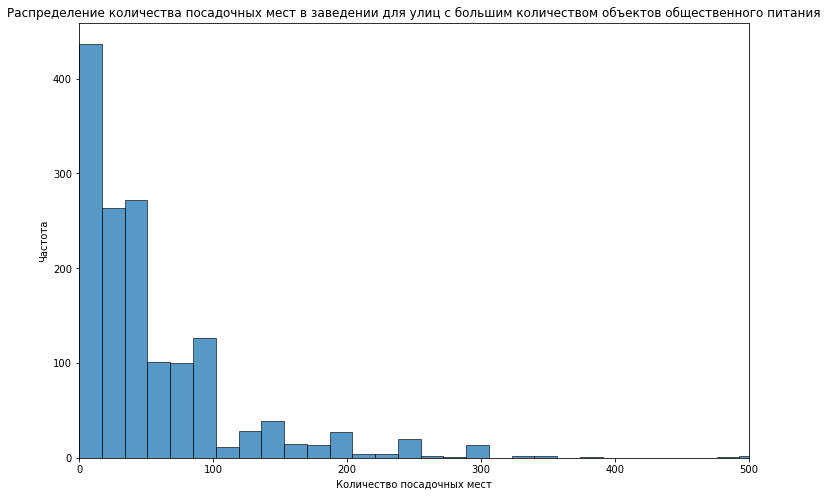

In [52]:
plt.figure(figsize=(12, 8))
n = sns.histplot(data=top, x="number",bins=100)
n.set(xlim=(0, 500))
plt.title('Распределение количества посадочных мест в заведении для улиц с большим количеством объектов общественного питания')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

Text(0, 0.5, 'Улицы')

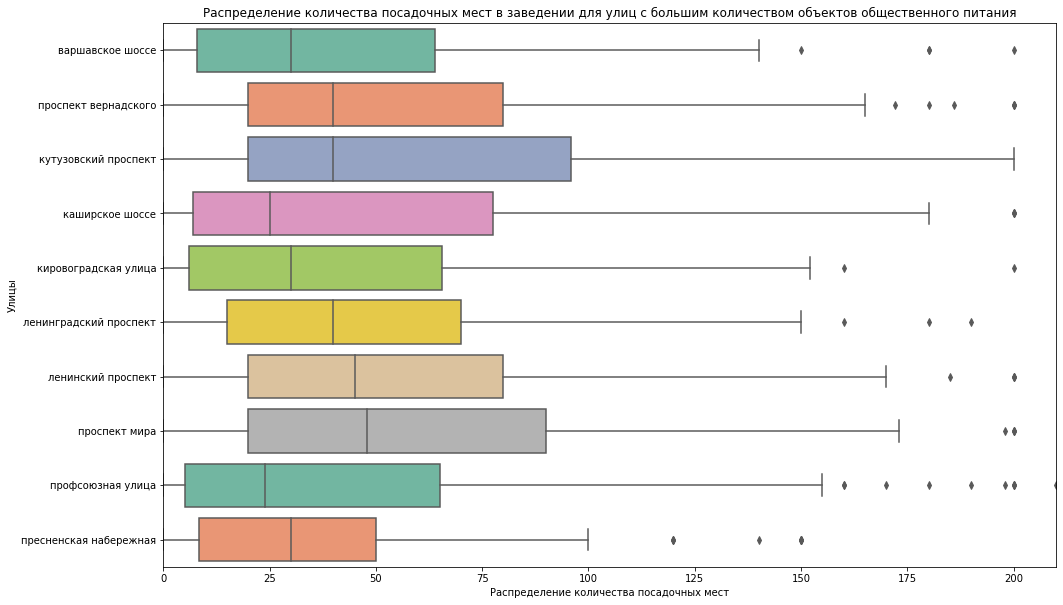

In [53]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(orient="h", palette="Set2",x='number',y='street', data=top)
plt.xlim(0, 210)
plt.title('Распределение количества посадочных мест в заведении для улиц с большим количеством объектов общественного питания')
plt.xlabel('Распределение количества посадочных мест')
plt.ylabel('Улицы')


In [54]:
top['number'].describe()


count    1490.000000
mean       58.273826
std        90.259131
min         0.000000
25%        12.000000
50%        40.000000
75%        75.000000
max      1700.000000
Name: number, dtype: float64

Большая часть заведений (75% данных) имеет 75 посадочных мест и менее. 50% имеют до 40 посадочных мест. При этом максимальное значение достигает 1700. Наибольший "разброс" характерен для Кутузовского проспекта, Каширского шоссе и проспекта Мира.

## Шаг №3. Общий вывод и рекомендации. <a id="conclusion"></a>

Большее количество заведений среди форматов: кафе (40% заведений), столовая (17%), ресторан (15%). На рынке сетевые заведения составляют 19%, остальные 81% - несетевые. Сетевое распространение наиболее характерно для предприятий быстрого обслуживания, отделов кулинарии в магазинах и ресторанов.
Для сетевых заведений характерно меньшее количество заведений и большее количество посадочных мест: 75% сетей имеют до 3 точек общественного питания и до 84 посадочных мест в заведении. Наибольшее количество посадочных мест характерно для столовых (в среднем 130), ресторанов (в среднем 97), буфетов (в среднем 51). 
Больше всего объектов общественного питания находится на улицах: проспект Мир (203 заведения), Профсоюзная улица (181), Ленинградский проспект (170).При этом 16% улиц от общего числа имеют по одному заведению.


***Рекомендации***

Наиболее популярными (больше всего заведений) форматами являются кафе, столовая, ресторан, а для сетевых заведений также и предприятие быстрого обслуживания. Поэтому можно предположить, что со стороны посетителей такие заведения также пользуются спросом.   
При создании сети заведений наиболее распространенным решением является открытие меньшего количества заведений и большего количества посадочных мест.    
Топ-10 улиц  по количеству заведений вероятно также востребованы среди посетителей, однако в этом случае придется столкнуться с сильной конкуренцией и большими инвестициями. Можно рассмотреть районы/улицы с меньшим количеством заведением, но растущим потоком потенциальных посетителей. 

Для полного анализа необходимо дополнительно проанализировать спрос клиентов на рынке заведений общественного питания, какие факторы при выборе заведения для посещения являются ключевыми. В дальнейшем анализе также необходимо выделить более узкую нишу и выбрать несколько конкурентов для проведения конкурентного анализа для наиболее точной будущей оценки окупаемости проекта. 